<a href="https://colab.research.google.com/github/harshit7271/NLP-/blob/main/Word2Vec_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd


In [9]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 69.2 MB/s eta 0:00:00


In [5]:
import gensim
import os

In [7]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [16]:
story = []
for filename in os.listdir('data'):

  with open(os.path.join('data', filename), encoding='utf-8', errors="ignore") as f:
    corpus = f.read()
  tokenized_data = sent_tokenize(corpus)
  for i in tokenized_data:
    story.append(simple_preprocess(i))



In [17]:
len(story)

158874

In [22]:
for item in story[:5]:
  print(item)

['game', 'of', 'thrones', 'book', 'one', 'of', 'song', 'of', 'ice', 'and', 'fire', 'by', 'george', 'martin', 'prologue', 'we', 'should', 'start', 'back', 'gared', 'urged', 'as', 'the', 'woods', 'began', 'to', 'grow', 'dark', 'around', 'them']
['the', 'wildlings', 'are', 'dead']
['do', 'the', 'dead', 'frighten', 'you']
['ser', 'waymar', 'royce', 'asked', 'with', 'just', 'the', 'hint', 'of', 'smile']
['gared', 'did', 'not', 'rise', 'to', 'the', 'bait']


In [24]:
# MODEL CONFIGURATION

model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)                # Word2VEC IS CLASS UNDER GENSIM

In [25]:
model.build_vocab(story)   # There are many words in our corpus, so will extract unique words using build_vocab (story has whole corpus)

In [27]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)   # total_examples means how many sentences are there in our corpus

(6573939, 8625265)

In [29]:
# Will now access word2vec model using
model.wv.most_similar('dragon')

[('dragons', 0.689274251461029),
 ('daenerys', 0.550575315952301),
 ('targaryen', 0.5202918648719788),
 ('dynasty', 0.5016844272613525),
 ('aegon', 0.48817580938339233),
 ('valyria', 0.4841756224632263),
 ('cities', 0.47992372512817383),
 ('crown', 0.47895321249961853),
 ('qarth', 0.47689926624298096),
 ('sea', 0.47429555654525757)]

In [30]:
model.wv.most_similar('king')

[('kings', 0.8176556825637817),
 ('baratheon', 0.653322160243988),
 ('realm', 0.5966665744781494),
 ('tourney', 0.5621440410614014),
 ('usurper', 0.5537251830101013),
 ('royal', 0.5288586616516113),
 ('prince', 0.522528350353241),
 ('throne', 0.520402729511261),
 ('targaryen', 0.5045199990272522),
 ('myrcella', 0.49936115741729736)]

In [32]:
model.wv['dragon']   # vector representation of dragon

array([ 8.3619982e-01, -1.0961348e-01,  1.8092573e+00,  2.2220619e+00,
       -8.8090003e-01, -2.1085714e-01, -1.4759558e+00,  1.0188476e-01,
       -9.3151772e-01,  2.8333485e-01, -1.8044300e+00, -1.8012588e+00,
       -5.9202641e-02, -1.6800739e+00, -1.5061550e+00, -9.0507883e-01,
        4.3989295e-01, -8.5661238e-01, -1.3858144e-01,  6.3032681e-01,
        1.4718120e+00,  3.8877100e-01,  2.9802666e+00, -1.7715710e+00,
        4.9492300e-01,  9.0869004e-01,  6.2239927e-01,  7.0318693e-01,
       -1.4216547e+00, -7.4459273e-01, -2.1641742e-01,  1.5393775e+00,
        9.1186887e-01, -7.9496258e-01,  1.8798729e+00,  1.3908559e-01,
        1.1280874e+00,  9.4658524e-01, -9.0622282e-01,  1.5837696e+00,
       -1.6111995e+00,  6.8317658e-01, -1.7933718e+00, -1.2810235e+00,
        1.4048547e+00, -5.3423256e-02,  5.6482154e-01,  1.6539702e+00,
        4.1327760e-01, -1.0642174e+00,  1.1023794e+00,  1.8966563e+00,
       -1.4628108e-01,  7.5264350e-02,  5.4803669e-01, -3.6737207e-01,
      

In [33]:
model.wv.similarity('king', 'queen')

np.float32(0.42793256)

In [34]:
# since they are in very high (100) dimension i can not visualize it so i will use dimensionality reducion to make it in 3D using PCA

model.wv.get_normed_vectors()   # will give all vectors in once

array([[ 0.03156394, -0.0361273 ,  0.15850544, ..., -0.00434697,
         0.13060218,  0.05062109],
       [-0.05551132, -0.05408555,  0.06129588, ...,  0.04394259,
         0.1783023 ,  0.06517132],
       [ 0.0155106 , -0.10626733,  0.00734391, ..., -0.11369484,
         0.13050446, -0.05200201],
       ...,
       [-0.09427746, -0.21698804,  0.0988697 , ...,  0.05457653,
         0.13908607,  0.02207974],
       [ 0.0044749 ,  0.03739315,  0.06405761, ..., -0.14653389,
         0.00992704, -0.01839309],
       [ 0.07949131, -0.01762812,  0.00115298, ...,  0.11111315,
         0.04032111, -0.22997466]], dtype=float32)

In [35]:
model.wv.get_normed_vectors().shape

(17869, 100)

In [43]:
y = model.wv.index_to_key
y

['the',
 'and',
 'to',
 'of',
 'he',
 'his',
 'was',
 'you',
 'her',
 'in',
 'it',
 'had',
 'that',
 'she',
 'as',
 'with',
 'him',
 'not',
 'but',
 'for',
 'they',
 'is',
 'at',
 'on',
 'said',
 'my',
 'have',
 'be',
 'them',
 'lord',
 'no',
 'from',
 'were',
 'would',
 'me',
 'your',
 'one',
 'all',
 'when',
 'will',
 'ser',
 'if',
 'so',
 'their',
 'could',
 'are',
 'we',
 'man',
 'there',
 'this',
 'up',
 'been',
 'what',
 'did',
 'by',
 'do',
 'men',
 'back',
 'out',
 'more',
 'or',
 'king',
 'who',
 'well',
 'down',
 'than',
 'only',
 'like',
 'jon',
 'some',
 'old',
 'hand',
 'even',
 'too',
 'before',
 'never',
 'tyrion',
 'off',
 'an',
 'know',
 'see',
 'into',
 'made',
 'father',
 'now',
 'eyes',
 'black',
 'told',
 'thought',
 'lady',
 'time',
 'then',
 'how',
 'long',
 'has',
 'might',
 'us',
 'come',
 'where',
 'here',
 'can',
 'through',
 'still',
 'face',
 'head',
 'red',
 'way',
 'page',
 'boy',
 'must',
 'once',
 'good',
 'two',
 'over',
 'little',
 'about',
 'brother'

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=3)


In [45]:
X = pca.fit_transform(model.wv.get_normed_vectors())

In [46]:
X[:5]

array([[-0.37695274, -0.25470796,  0.02066664],
       [-0.24990773, -0.09097874, -0.03670558],
       [-0.00471687, -0.5086476 , -0.12732057],
       [-0.09519464, -0.21123506,  0.04215409],
       [-0.16973895, -0.39860606, -0.11408757]], dtype=float32)

In [47]:
X.shape   # now 3 dimensional

(17869, 3)

In [54]:
import plotly.express as px
fig = px.scatter_3d(X[:400], x=0, y=1, z=2, color=y[:400])
fig.show()

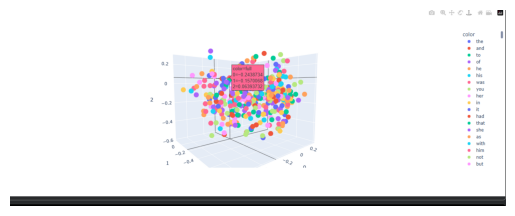

In [56]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("Screenshot 2025-12-28 233141.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()